# Installing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Performing preprocessing 

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
house_df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
# if u dont include columns parameter then the columns are name 0,1... which has no point as u dont kmow which column is which

In [4]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# adding the target column 
house_df['MedHouseVal'] = house_price_dataset.target
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# checking the shape of the data frame
house_df.shape

(20640, 9)

In [7]:
#checking for missing values
house_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
# statstical measure of the dataset 
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# correlations between different variables 
1. positive corelation - one variable increases then the other vaiable also increases
2. negative corelation - one vairable decreases then the other variable also decreases

In [9]:
correaltion = house_df.corr()

<Axes: >

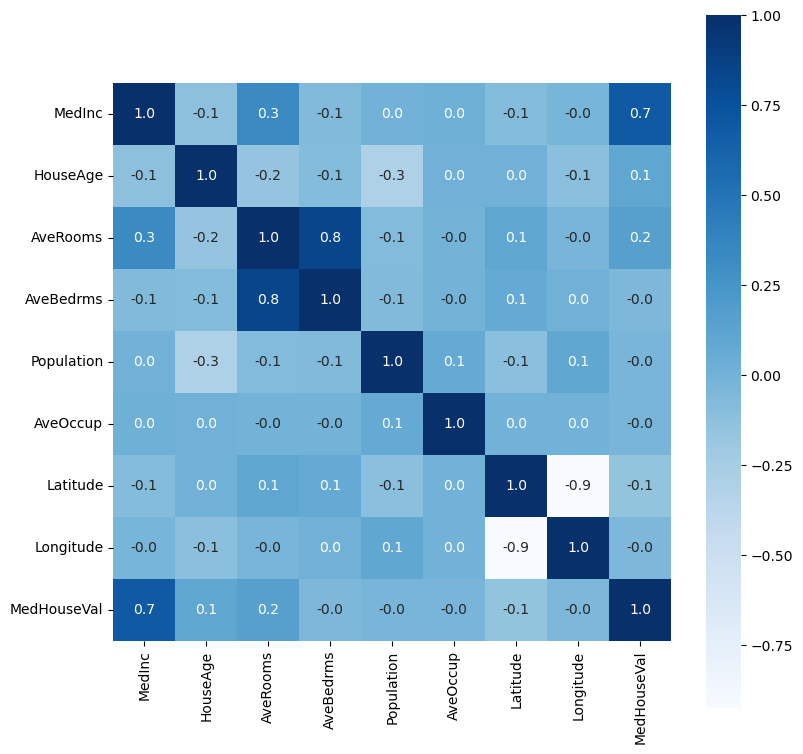

In [10]:
# making a heatmap for correaltion 
plt.figure(figsize=(9,9))
sb.heatmap(correaltion, cbar=True, square=True, fmt='.01f', annot=True, annot_kws={'size': 10}, cmap='Blues')

dropping the value label and splitting the data

In [13]:
X = house_df.drop(['MedHouseVal'], axis = 1)
Y = house_df['MedHouseVal']
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15,random_state = 2)

In [43]:
print(x_test.shape);
y_test.shape

(3096, 8)


(3096,)

# Model training using XGBoost

In [44]:
model = XGBRegressor()

In [45]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Evaluation 

In [46]:
pred_train = model.predict(x_train) #should be done on test but karo lo 

In [47]:
# using R square error
score_1 = metrics.r2_score(y_train,pred_train)

#Mean absolute Error
score_2 = metrics.mean_absolute_error(y_train,pred_train)

print("score 1 ", score_1)
print("score 2", score_2)

score 1  0.9401852709613202
score 2 0.19899695565442474


# visualization of training values 

Text(0.5, 1.0, 'Actual vs Predicted Price')

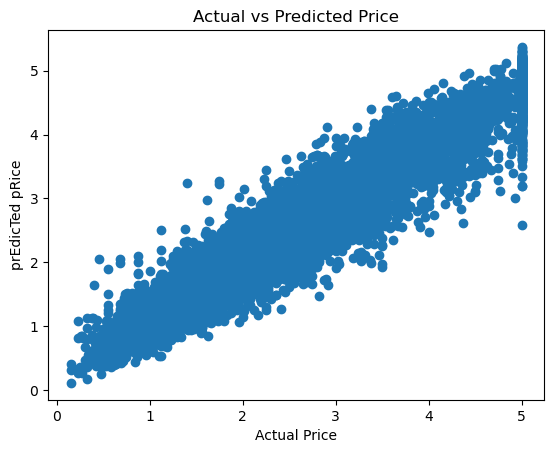

In [48]:
plt.scatter(y_train,pred_train)
plt.xlabel("Actual Price")
plt.ylabel("prEdicTed pRice")
plt.title("Actual vs Predicted Price")

In [49]:
pred = model.predict(x_test) #should be done on test but karo lo 

In [50]:
# using R square error
score_1 = metrics.r2_score(y_test,pred)

#Mean absolute Error
score_2 = metrics.mean_absolute_error(y_test,pred)

print("score 1 ", score_1)
print("score 2", score_2)

score 1  0.8385612141243847
score 2 0.30701960676565343


# visualization of price values in test data 

Text(0.5, 1.0, 'Actual vs Predicted Price')

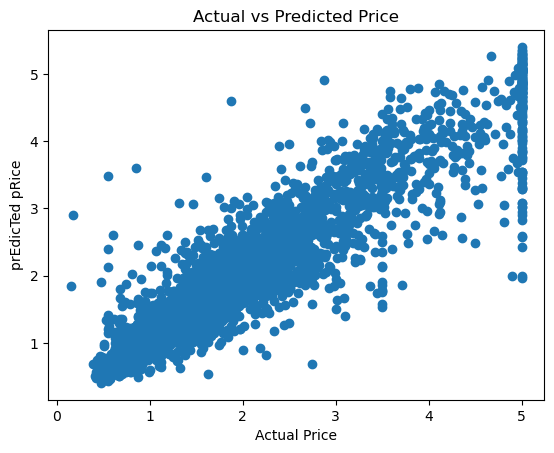

In [51]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("prEdicTed pRice")
plt.title("Actual vs Predicted Price")